In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_csv = pd.read_csv(mouse_drug_data_to_load, delimiter=",")
clinical_csv = pd.read_csv(clinical_trial_data_to_load, delimiter=",")

# Combine the data into a single dataset
output_df = pd.merge(clinical_csv, mouse_csv, how = "inner")

# Display the data table for preview
output_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint, Convert to DataFrame, Preview DataFrame
tumor_volume_mean = pd.DataFrame(output_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()).reset_index()
tumor_volume_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint, Convert to DataFrame, Preview DataFrame
tumor_volume_sem = pd.DataFrame(output_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()).reset_index()
tumor_volume_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
sorted_df = output_df.reset_index().pivot_table(values="Tumor Volume (mm3)", index="Timepoint", columns="Drug", aggfunc='mean')
# Preview that Reformatting worked
sorted_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
#Standard Error dataframe for accessibility 
sem_df = output_df.reset_index().pivot_table(values="Tumor Volume (mm3)", index="Timepoint", columns="Drug", aggfunc='sem')

In [6]:
###Define plotting function for easy use
def myplot(ax, x_axis, df_means, df_sem, drug):
    import random
    fmt = ["o","1","2","3","4","s","p","h","x","+", "d"]
    ax.errorbar(x_axis, df_means[drug], df_sem[drug], fmt=random.choice(fmt), linestyle="--", label=drug)
    
###Define fig saving function
def fig_save(fig, file_name):
    import os
    path = os.path.join("images", file_name)
    fig.savefig(path)

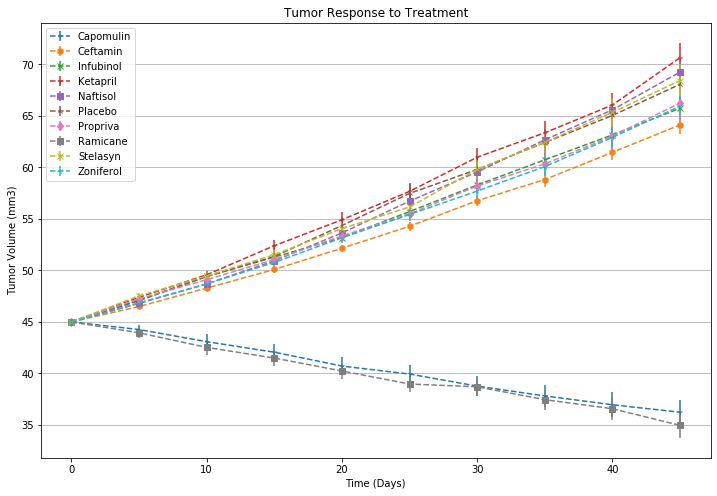

In [7]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
drugs = [drug for drug in sorted_df.columns]
myplot(ax, sorted_df.index, sorted_df, sem_df, "Capomulin")
myplot(ax, sorted_df.index, sorted_df, sem_df, "Ceftamin")
myplot(ax, sorted_df.index, sorted_df, sem_df, "Infubinol")
myplot(ax, sorted_df.index, sorted_df, sem_df, "Ketapril")
myplot(ax, sorted_df.index, sorted_df, sem_df, "Naftisol")
myplot(ax, sorted_df.index, sorted_df, sem_df, "Placebo")
myplot(ax, sorted_df.index, sorted_df, sem_df, "Propriva")
myplot(ax, sorted_df.index, sorted_df, sem_df, "Ramicane")
myplot(ax, sorted_df.index, sorted_df, sem_df, "Stelasyn")
myplot(ax, sorted_df.index, sorted_df, sem_df, "Zoniferol")
ax.legend(loc="best");
ax.set(xlabel="Time (Days)", ylabel="Tumor Volume (mm3)", title="Tumor Response to Treatment");
ax.grid(axis="y")
fig.set_size_inches(12, 8)
# Save the figure
fig_save(fig, "tumor_response.png")

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
metastatic_mean = pd.DataFrame(output_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()).reset_index()
metastatic_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
metastatic_sem = pd.DataFrame(output_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()).reset_index()
metastatic_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_df = output_df.reset_index().pivot_table(values="Metastatic Sites", index="Timepoint", columns="Drug", aggfunc='mean')
# Preview that Reformatting worked
met_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [11]:
#Standard Error dataframe for accessibility
met_sem = output_df.reset_index().pivot_table(values="Metastatic Sites", index="Timepoint", columns="Drug", aggfunc='sem')

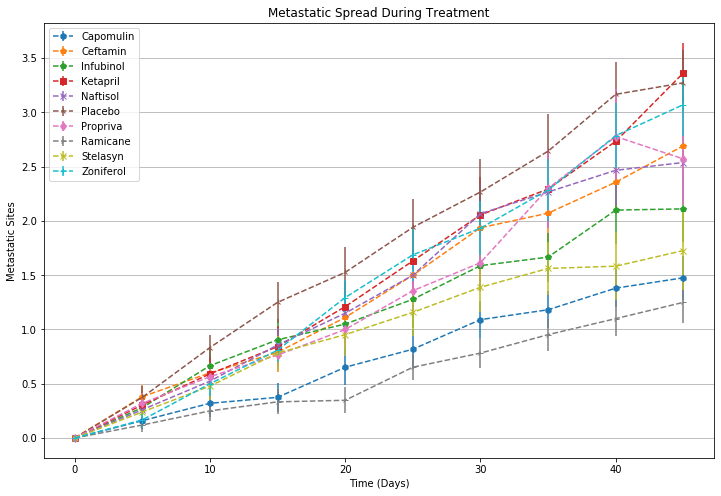

In [12]:
# Generate the Plot (with Error Bars)
fig2, ax2 = plt.subplots()
myplot(ax2, sorted_df.index, met_df, met_sem, "Capomulin")
myplot(ax2, sorted_df.index, met_df, met_sem, "Ceftamin")
myplot(ax2, sorted_df.index, met_df, met_sem, "Infubinol")
myplot(ax2, sorted_df.index, met_df, met_sem, "Ketapril")
myplot(ax2, sorted_df.index, met_df, met_sem, "Naftisol")
myplot(ax2, sorted_df.index, met_df, met_sem, "Placebo")
myplot(ax2, sorted_df.index, met_df, met_sem, "Propriva")
myplot(ax2, sorted_df.index, met_df, met_sem, "Ramicane")
myplot(ax2, sorted_df.index, met_df, met_sem, "Stelasyn")
myplot(ax2, sorted_df.index, met_df, met_sem, "Zoniferol")
ax2.legend(loc="best");
ax2.set(xlabel="Time (Days)", ylabel="Metastatic Sites", title="Metastatic Spread During Treatment");
ax2.grid(axis="y")
fig2.set_size_inches(12, 8)

# Save the figure
fig_save(fig2, "metastatic_spread.png")

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
mouse_count = pd.DataFrame(output_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()).reset_index()
mouse_count.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mice_df = output_df.reset_index().pivot_table(values="Mouse ID", index="Timepoint", columns="Drug", aggfunc='count')
# Preview the Data Frame
mice_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [15]:
###Define modified plotting formula for percentages
def myplot_percent(ax, x_axis, df_means, df_sem, drug):
    import random
    fmt = ["o","1","2","3","4","s","p","h","x","+", "d"]
    ax.errorbar(x_axis, (df_means[drug]/25)*100, df_sem[drug], fmt=random.choice(fmt), linestyle="--", label=drug)

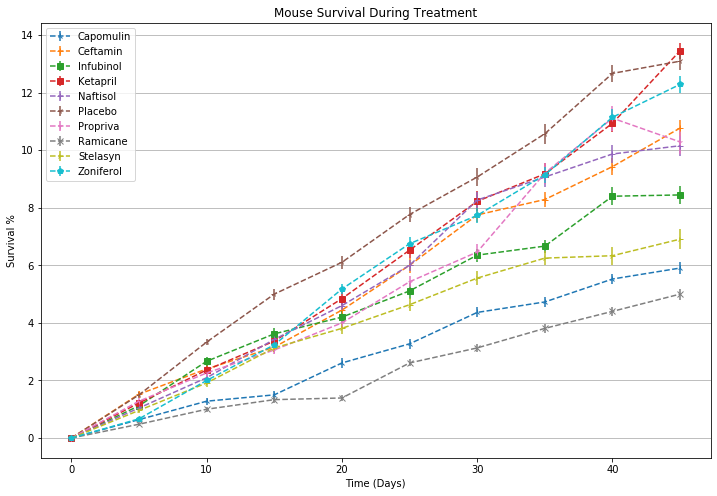

In [16]:
# Generate the Plot (Accounting for percentages)
fig3, ax3 = plt.subplots()
myplot_percent(ax3, sorted_df.index, met_df, met_sem, "Capomulin")
myplot_percent(ax3, sorted_df.index, met_df, met_sem, "Ceftamin")
myplot_percent(ax3, sorted_df.index, met_df, met_sem, "Infubinol")
myplot_percent(ax3, sorted_df.index, met_df, met_sem, "Ketapril")
myplot_percent(ax3, sorted_df.index, met_df, met_sem, "Naftisol")
myplot_percent(ax3, sorted_df.index, met_df, met_sem, "Placebo")
myplot_percent(ax3, sorted_df.index, met_df, met_sem, "Propriva")
myplot_percent(ax3, sorted_df.index, met_df, met_sem, "Ramicane")
myplot_percent(ax3, sorted_df.index, met_df, met_sem, "Stelasyn")               
myplot_percent(ax3, sorted_df.index, met_df, met_sem, "Zoniferol")
ax3.legend(loc="best");
ax3.set(xlabel="Time (Days)", ylabel="Survival %", title="Mouse Survival During Treatment");
ax3.grid(axis="y")
fig3.set_size_inches(12, 8)

# Save the Figure
fig_save(fig3, "mouse_survival.png")

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
perc_change = pd.DataFrame(((sorted_df[drug][45]-sorted_df[drug][0])/sorted_df[drug][0])*100 for drug in sorted_df)
# Display the data to confirm
perc_change = perc_change.set_index(sorted_df.columns)
perc_change = perc_change.rename(columns={0: "Percentage"})
perc_change["Percentage"]

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Percentage, dtype: float64

In [18]:
# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax4.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="black")
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax4.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="black")

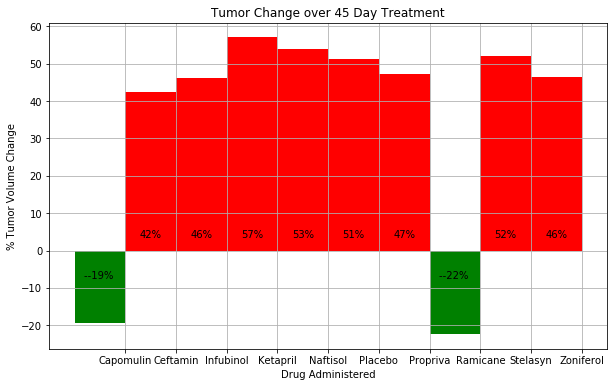

In [19]:
#Summary Bar Graph
fig4, ax4 = plt.subplots()
ind = np.arange(len(perc_change["Percentage"]))  
passing0 = ax4.bar(ind[0], perc_change["Percentage"][0], width=-1, color='green', align="edge")
passing7 = ax4.bar(ind[7], perc_change["Percentage"][7], width=-1, color='green', align="edge")
failing1 = ax4.bar(ind[1], perc_change["Percentage"][1], width=-1, color='red', align="edge")
failing2 = ax4.bar(ind[2], perc_change["Percentage"][2], width=-1, color='red', align="edge")
failing3 = ax4.bar(ind[3], perc_change["Percentage"][3], width=-1, color='red', align="edge")
failing4 = ax4.bar(ind[4], perc_change["Percentage"][4], width=-1, color='red', align="edge")
failing5 = ax4.bar(ind[5], perc_change["Percentage"][5], width=-1, color='red', align="edge")
failing6 = ax4.bar(ind[6], perc_change["Percentage"][6], width=-1, color='red', align="edge")
failing8 = ax4.bar(ind[8], perc_change["Percentage"][8], width=-1, color='red', align="edge")
failing9 = ax4.bar(ind[9], perc_change["Percentage"][9], width=-1, color='red', align="edge")

fig4.set_size_inches(10, 6)
ax4.set(xlabel="Drug Administered", ylabel="% Tumor Volume Change", title="Tumor Change over 45 Day Treatment");
ax4.set_xticks(ind)
ax4.set_xticklabels(sorted_df.columns)
ax4.grid()

autolabelPass(passing0)
autolabelPass(passing7)
autolabelFail(failing1)
autolabelFail(failing2)
autolabelFail(failing3)
autolabelFail(failing4)
autolabelFail(failing5)
autolabelFail(failing6)
autolabelFail(failing8)
autolabelFail(failing9)
# #Save fig
fig_save(fig4, "tumor_change.png")